# Overview

This week is about two topics. Decision trees and clustering. The main exercise will be on decision trees, and we'll also talk a bit about unbalanced data sets as well as a little exercise on clustering, an example of unsupervised learning.  

## Part 1: Decision trees (DSFS Chapter 17)

> _Reading I_: The visual introduction to decision trees on [**this webpage**](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
) is AMAZING. Take a look to get an intuitive feel for how trees work. Do not miss this one, it's a treat!

---

> _Reading II_: DSFS Chapter 17. Work through chapter 17 of the book. It's not as flashy as the fancy `D3.js` based web-explanation above, but it's very good (in my humble opinion).

###  _Exercises_: Just a few questions to make sure you've read the text and/or watched the video.

> * There are two main kinds of decision trees depending on the type of output (numeric vs. categorical). What are they?

One type is the use of decision trees to predict continuous outputs (regression) and other one is used to predict discrete/categorical outputs (classification).

> * Explain in your own words: Why is _entropy_ useful when deciding where to split the data?

Entropy is used a a measure of how pure a given split is. If there is little "chaos" in a given split, the entropy is low and were are therefore quite able to separated the classes.

> * Why are trees prone to [overfitting](https://www.youtube.com/watch?v=DQWI1kvmwRg)?

If we don't limit the depth of the trees, they can keep growing deeper and deeper where we basically have a given path down the tree ending up in a single observation.

> * Explain (in your own words) how random forests help prevent overfitting.

Random forests use bootstrapping to only on a subset of the data at a time - by having a "forest" (read: collection) of decision tees each fitted to a given subet, and then using all of these in conjuction as a majority vote classifier - we avoid fitting to single data points too much.

Chief Suneman arrives at work one day and immediately starts motivating the team by randomly yelling at everyone in order to increase morale - something like [this](https://www.youtube.com/watch?v=L_QCioSGgwU). After a while, the team gets him calmed down with a cup of coffee and a movie. It doesn't help, after watching the first 10 minutes (see below) he comes out of his office with an outrageous request for the newly appointed data science team

The chief wants you to start from real data and build a system that replicates the functionality in the _Minority Report_ system. Imagine, we find out that certain type of crime is going to take place - as well as the exact time of the crime - **but that we don't know _where_**, then Suneman wants an algorithm that will predict which district the crime is most likely to take place in. Specifically, let's build an algorithm that predicts the location of a crime based on its type and time.

The friendly leader of the data-science team, Captain Mones, helps break down the task.

> _Exercise_: Building the _minority report_ algorithm
>
> * Use the category of the crimes (e.g. `ASSAULT`, `LARCENY/THEFT`, ...) to build a decision tree that predicts the corresponding district (e.g. `TENDERLOIN`, `MISSION`, etc). I recommend useing the [`DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/tree.html) class in scikit-learn (but you can also try the ID3 tree in the DSFS book - note, though, that this one only does binary classification). For training, use 90% of the data and test the tree prediction on the remaining 10%. 
 * **Hint**: The scikit-learn fit function needs a list of lists as input (even if your nested lists have length 1). 
>  - What is the fraction of correct predictions? 
>  - What are the correct predictions if you restrict the training/prediction to single districts (for example, predicting Mission vs. all other districts, etc)? 
>   - Compare it to the random guess, what would you get if you'd guess a district randomly? 
>   - And if you'd guess always one of the districts (for example the district with the most crimes)?
> * Now, add the day of the week to the features, do any of the the performance measures improve? 
> * ***OPTIONAL***: Visualize the tree so that you can see what it actually does! For visualization, you can use the export_graphviz method of `scikit-learn` and then convert the `.dot` file to a PDF. 
>   - **Note**: [in order to use GraphViz in IPython, you need to install it on your system first](http://www.graphviz.org/Download..php)!
>       - **Windows users** should download and install the *.msi* file and not the zip file
>       - **MAC users** should download and install the *.pkg* file
>       - If you see the error *"Couldn't import dot_parser"* you can try the following steps:
```
            >>> ~/anaconda/bin/pip uninstall pyparsing
            >>> ~/anaconda/bin/pip uninstall pydot
            >>> ~/anaconda/bin/pip install pyparsing==1.5.7
            >>> ~/anaconda/bin/pip install pydot
            > And then restart the kernel
```
> * As you might see in the visualization, the tree runs out of possible feature values to check before refining the decision. Try increasing the number of features: add part of the day (`night`=0-5, `morning`=6-10, `midday`=11-14, `afternoon`=15-17, `evening`=18-23). Is it better? What is the problem we're solving by breaking the day into parts rather than raw hour values?
> * Let's try some examples to see if the algorithm is working. 
>  - There is a new crime (prositution) on Monday 10pm. What are the three most likely districts? 
>  - Also find the most likely districts for a gambling on Wednesday 1pm. 
>  - And also try out an arson case on Sunday 7am?
> * It's unlikely that the classifier overfits in our case. Explain why. 

* **Use the category of the crimes (e.g. ASSAULT, LARCENY/THEFT, ...) to build a decision tree that predicts the corresponding district (e.g. TENDERLOIN, MISSION, etc). I recommend useing the DecisionTreeClassifier class in scikit-learn (but you can also try the ID3 tree in the DSFS book - note, though, that this one only does binary classification). For training, use 90% of the data and test the tree prediction on the remaining 10%.**

First, the data is loaded into a dataframe.

In [1]:
import numpy as np
import pandas as pd
import geoplotlib as gp
from scipy import stats
from collections import Counter
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../SFPD_Incidents_-_from_1_January_2003.csv")
df = df.dropna()

Since there are some outliers in the locations - we drop them out.

In [3]:
df = df[(np.abs(stats.zscore(df[['X','Y']])) < 5).all(axis=1)]

In [4]:
columns = ['Category', 'PdDistrict', 'DayOfWeek', 'Time', 'X', 'Y']
dt_df = df[columns]

Next, classification outputs for the type of crimes are added

In [5]:
df['PdDistrict'] = df.loc[:,'PdDistrict'].astype('category')
df['Class'] = df.loc[:,'PdDistrict'].cat.codes

df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Class
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000,3
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074,9
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014,9
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200,9
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160,4


Now, before fitting to the decision tree classifier - the data must be numerically encoded.

In [6]:
from sklearn.preprocessing import LabelEncoder as LE

# First the categorical training and test data is selected
X = np.array(df['Category'])
y = np.array(df['PdDistrict'])

# In order to transform to numerical values, a LE is set up
LE_X = LE()
LE_y = LE()

LE_X.fit(np.unique(X))
LE_y.fit(np.unique(y))

# The data is transformed to numerical values w. the LE
X_num = LE_X.transform(X)
y_num = LE_y.transform(y)

In [7]:
# Values can be transformed back to categorical like so:
list(LE_X.inverse_transform(X_num[0:10]))

['NON-CRIMINAL',
 'ROBBERY',
 'ASSAULT',
 'SECONDARY CODES',
 'VANDALISM',
 'NON-CRIMINAL',
 'SECONDARY CODES',
 'VANDALISM',
 'BURGLARY',
 'LARCENY/THEFT']

Now, the data can be split into training and testing sets.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, test_size=0.10, random_state=0)

Finally, predictions with the decision tree classifier can be done.

In [9]:
from sklearn import tree

# Classifiers need the data to be passed in as a Nx1 vector 
X_train = X_train.reshape(-1,1)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train.reshape(-1,1), y_train)

* What is the fraction of correct predictions?

The accuracy of the trained calssifier can be tested on the 10% test set - which results in an accuracy score of 20%.

In [10]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test.reshape(-1,1))

accuracy_score(y_true=y_test, y_pred=y_pred)

0.20315457101490811

* What are the correct predictions if you restrict the training/prediction to single districts (for example, predicting Mission vs. all other districts, etc)?


First, the encoding for the 'MISSION' district is looked at:

In [11]:
LE_y.transform(['MISSION'])

array([3])

Now, the target needs to be changed to reflect that we only target values is 'MISSION' (1) and the other districts are 0.

In [12]:
def binarize_districts(cell):
    return 1 if cell == 3 else 0

binarize_districts = np.vectorize(binarize_districts, otypes=[np.int]) # to make the code run faster

y_train_binarized = binarize_districts(y_train)
y_test_binarized = binarize_districts(y_test)

Now we can train and test the model on binarized data.

In [13]:
clf_bin = tree.DecisionTreeClassifier()
clf_bin = clf_bin.fit(X_train, y_train_binarized)

In [14]:
y_pred_binarized = clf_bin.predict(X_test.reshape(-1,1))

accuracy_score(y_true=y_test_binarized, y_pred=y_pred_binarized)

0.8659653214608668

As can be seen, there is a pretty good accuracy score of predicting only whether a given crime is in mission or not based on the category of the crime. Most likely it is due to the fact that *a lot* of the prostitution and drug crimes in SF happen in Mission. Therefore the decision tree is asking whether a crime is one of the two and prediction Mission or not based on that.

* Compare it to the random guess, what would you get if you'd guess a district randomly?

As can be seen, there are 39 crime categories between 0 and 38 in the dataset - therefore a random guess will be a number within that range for every cell.

In [15]:
np.unique(X_num)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38])

In [16]:
y_pred_random = np.random.randint(39, size=y_test.shape[0]) # create an array of random ints

In [17]:
accuracy_score(y_true=y_test, y_pred=y_pred_random)

0.025541944824655462

As can be seen, the result is a very low accuracy score. Therefore it can be said with quite some confidence that using the trained model of crime categories as inputs and districts as output performs better than random guessing.

* And if you'd guess always one of the districts (for example the district with the most crimes)?

First, the count of different districts and choose the most common one (best case scenario of predicting a single district) is looked at.

In [18]:
Counter(df['PdDistrict']).most_common()[0]

('SOUTHERN', 364493)

In [19]:
total_obs = df.shape[0]

In [20]:
total_obs

2023721

Predicting all observations to be 'SOUTHERN' would yield in a true positive count of 364516 and a false positive count of $2.023.864 - 364.516 = 1.659.348$. Therefore, the accuracy of such a classifier is:

In [21]:
364516/total_obs

0.18012166696891518

* **Now, add the day of the week to the features, do any of the the performance measures improve?**

In [22]:
X_2d = df[['Category', 'DayOfWeek']]
X_2d = X_2d.apply(LE().fit_transform)
X_2d.head()

,Category,DayOfWeek
0,20,1
1,25,3
2,1,3
3,27,3
4,35,5


In [23]:
# Note that we can still use y_num from before
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_num, test_size=0.10, random_state=0)

In [24]:
clf_2d = tree.DecisionTreeClassifier()
clf_2d = clf.fit(X_train_2d, y_train_2d)

In [25]:
y_pred_2d = clf_2d.predict(X_test_2d)

In [26]:
accuracy_score(y_true=y_test_2d, y_pred=y_pred_2d)

0.20300632989578649

As can be seen, adding the day of the week does not seem to improve the model performance over just using the category of the crime as input.

* **OPTIONAL: Visualize the tree so that you can see what it actually does! For visualization, you can use the export_graphviz method of scikit-learn and then convert the .dot file to a PDF.**

Note, only the binarized version (MISSION or not) of the DT is shown as the multiclass version is too big horizontally

In [27]:
tree.export_graphviz(clf_bin,out_file='tree_bin.dot',feature_names='Category', max_depth=3)

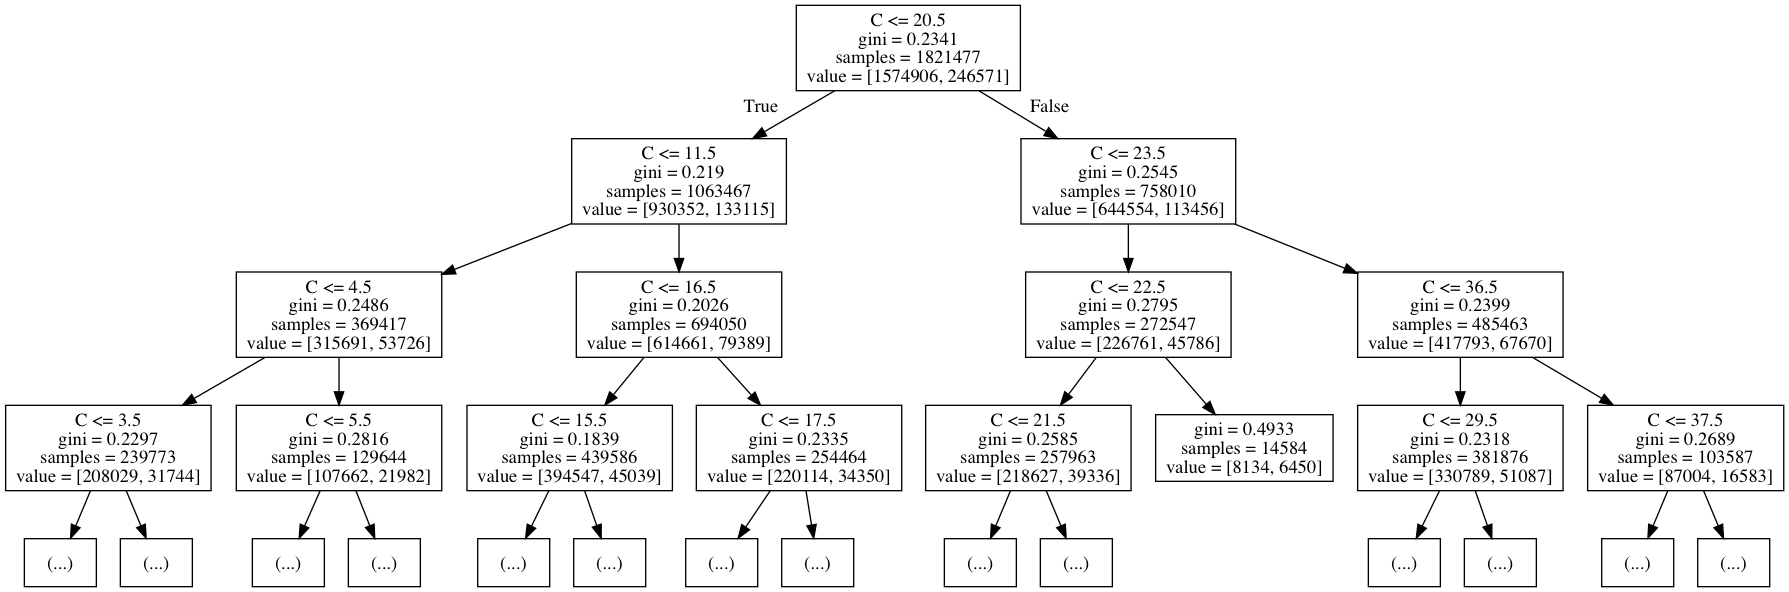

In [28]:
from IPython.display import Image
Image(filename='tree_bin.png') 

* **As you might see in the visualization, the tree runs out of possible feature values to check before refining the decision. Try increasing the number of features: add part of the day (`night`=0-5, `morning`=6-10, `midday`=11-14, `afternoon`=15-17, `evening`=18-23). Is it better? What is the problem we're solving by breaking the day into parts rather than raw hour values?**

In [29]:
def time_of_day_bin(time):
    
    if time[:2] in ('00', '01', '02', '03', '04'):
        return 'night'
    elif time[:2] in ('06', '07', '08', '09', '10'):
        return 'morning'
    elif time[:2] in ('11', '12', '13', '14'):
        return 'midday'
    elif time[:2] in ('15', '16', '17'):
        return 'afternoon'
    else:
        return 'evening'
    

df['Hour_day'] = df['Time'].apply(time_of_day_bin)

In [30]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Class,Hour_day
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000,3,midday
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074,9,afternoon
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014,9,afternoon
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200,9,afternoon
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160,4,evening


In [31]:
X_3d = df[['Category', 'DayOfWeek', 'Hour_day']]
X_3d = X_3d.apply(LE().fit_transform)
X_3d.head()

,Category,DayOfWeek,Hour_day
0,20,1,2
1,25,3,0
2,1,3,0
3,27,3,0
4,35,5,1


In [32]:
X_train_3d, X_test_3d, y_train_3d, y_test_3d = train_test_split(X_3d, y_num, test_size=0.10, random_state=0)

In [33]:
clf_3d = tree.DecisionTreeClassifier()
clf_3d = clf.fit(X_train_3d, y_train_3d)

In [34]:
y_pred_3d = clf_3d.predict(X_test_3d)

In [35]:
accuracy_score(y_true=y_test_3d, y_pred=y_pred_3d)

0.20427626214959504

Again, there seems to be little effect in adding the hour of day as an input to the decision tree classifier.

* **Let's try some examples to see if the algorithm is working.**

    - There is a new crime (prositution) on Monday 10pm. What are the three most likely districts? 
    - And also try out an arson case on Sunday 7am?
    - Also find the most likely districts for a gambling on Wednesday 1pm. 

In [36]:
# In order to transform to numerical values, a LE is set up
LE_CAT = LE()
LE_DAY = LE()
LE_TOD = LE()
LE_Y = LE()

LE_CAT.fit(np.unique(df['Category']))
LE_DAY.fit(np.unique(df['DayOfWeek']))
LE_TOD.fit(np.unique(df['Hour_day']))
LE_Y.fit(np.unique(df['PdDistrict']))

LabelEncoder()

In [37]:
# Prostitution on Monday at 10 pm

input_cat = LE_CAT.transform(['PROSTITUTION'])[0]
input_day = LE_DAY.transform(['Monday'])[0]
input_tod = LE_TOD.transform(['evening'])[0]

input_tot = np.array([input_cat, input_day, input_tod]).reshape(1, -1) 

prediction_props = clf_3d.predict_proba(input_tot) # do the actual probability prediction
top_probs = prediction_props[0].argsort()[-3:][::-1] # grab the top 3 ones

LE_Y.inverse_transform(top_probs)

array(['MISSION', 'NORTHERN', 'CENTRAL'], dtype=object)

In [38]:
# Arson Sunday at 7 am

input_cat = LE_CAT.transform(['ARSON'])[0]
input_day = LE_DAY.transform(['Sunday'])[0]
input_tod = LE_TOD.transform(['morning'])[0]

input_tot = np.array([input_cat, input_day, input_tod]).reshape(1, -1) 

prediction_props = clf_3d.predict_proba(input_tot) # do the actual probability predictionb
top_probs = prediction_props[0].argsort()[-3:][::-1] # grab the top 3 ones

LE_Y.inverse_transform(top_probs)

array(['BAYVIEW', 'INGLESIDE', 'SOUTHERN'], dtype=object)

In [39]:
# Gambling Wednesday at 1 pm

input_cat = LE_CAT.transform(['GAMBLING'])[0]
input_day = LE_DAY.transform(['Wednesday'])[0]
input_tod = LE_TOD.transform(['midday'])[0]

input_tot = np.array([input_cat, input_day, input_tod]).reshape(1, -1) 

prediction_props = clf_3d.predict_proba(input_tot) # do the actual probability predictionb
top_probs = prediction_props[0].argsort()[-3:][::-1] # grab the top 3 ones

LE_Y.inverse_transform(top_probs)

array(['INGLESIDE', 'NORTHERN', 'MISSION'], dtype=object)

* **It's unlikely that the classifier overfits in our case. Explain why.**

The reason is that the features can take on very few values - therefore we can only get a rough generalization of a given group of observations instead of fitting to single/very few observations.

### Digression: Decision trees and unbalanced data

An important problem in many data-science problems is _unbalanced data_. We consider a dataset balanced when the categories we care about have about equal size (e.g. if we want to predict the gender of individuals in the general population). When the category size are imbalanced (e.g. if we are looking for people with a rare disease such as _leukemia_ in the general population), many machine learning algorithms can have problems.

> _Reading_: [This article](http://arstechnica.co.uk/security/2016/02/the-nsas-skynet-program-may-be-killing-thousands-of-innocent-people/) does a great job of explaining the problem.

---

> _Exercises_: I know you read the article above, but just a few questions to make you reflect on the details of the story.
> 
> * Explain what features go into the terrorist detection model

Features include mobile data usage, location, how often the mobile is turned off, which people appear in the same location, how often SIM cards are switched and even if the mobile device is changed.

> * Which algorithm is used to detect the terrorists?

The Random Forest algorithm.

> * Do you agree with the algorithm that Al-Jazeera bureau chief is a good target? Justify your answer.

I can't say I agree with the labeling of the Al-Jazeera bureau chief as a terrorist - but I can understand the reason why he is being labeled as such. In the article it was mentioned that since he is often traveling to locations with high terrorist activity (since 

> * What's the size of the training set?

55 million people of the Pakistani population.

> * Why is it still a problem that the algorithm has a false alam rate at 0.18% at a 50% miss rate?

Because even if a false positive rate of 0.18% might seem low - it is very high if we consider that a predicted positive might mean the death of a person. Adding to that, 0.18% of 55 million is almost 100.000 people.

> * Do you have a better grasp of the problems with overfitting after reading this article?

On the general concept of overfitting, not really. But we can see how it applies to the method the NSA was using (if they were in fact making such an elementary mistake) since it is mentioned that they were testing the performance on their model on their own training set.

## Part 2: Clustering (DSFS Chapter 19)

Clustering is an important _unsupervised_ method to reveal structure in the data. You've already done a lot of hard work today, so let's make this one as easy as possible.

> _Reading_: Check out chapter 19 of DSFS

In this exercise we explore $K$-means clustering - and we it out on the locations of the `PROSTITUTION` crime type. Applying a clustering method makes sense because we know from our earlier work that this crime type tends to happen in only a few locations. We'll also talk a little bit about model selection and [overfitting](https://www.youtube.com/watch?v=DQWI1kvmwRg) in unsupervised models.

> _Exercise_: $K$-means
> 
> * Visualize the prostitution data (e.g. by plotting it on a map)
> * Train models of $K = 2,\ldots,10$ on the prostitution data.
> * Explore how the total squared error changes as a function of $K$ and identify what you think is the right number of clusers based on the knee-point in the squared error plot.
> * And by the way: The fit only gets better when we add more means - why not keep adding more of them: Explain in your own words why it makes sense to stop around a knee-point.
> * Another way of estimating the right number of clusters in a $K$-means problem is _stability analysis_. The idea is the following
>   - For each $K = 2,\ldots,10$ generate $N = 10$ clusterings based on random 50% of data (or some other fraction of data/bootstrap).
>   - Divide the space up into an e.g. 20 by 20 grid, and give each gridpoint an index $i$ in the range 1-400. 
>   - Now represent each clustering as a vector $\mathbf{c}^K$, which where the $j$th entry $c_j^K$ is given by the number of centroids in that gridpoint. Most of the entries will be zero, and we have that $\sum_{j = 1}^{400} c_j^K = K$.
>   - We now define _stability_ for some value of $K$ as average pairwise similarity of the $N$ clusterings, where the similarity between clustering $i$ and $j$ is the cosine distance between clustering vectors $\mathbf{c}^K(i)$ and $\mathbf{c}^K(j)$.
>   - We now say that the right $K$ maximizes stability.
> * Explain why stability should help you find the right number of clusters.
> * **Optional**: Perform stability analysis on the prostitution data. 

* **Visualize the prostitution data (e.g. by plotting it on a map).**

In [40]:
import geoplotlib as gp
from geoplotlib.utils import BoundingBox

# Selecting location for each type of crime
latitute_list = df[df['Category'] == 'PROSTITUTION']['Y']
longitude_list = df[df['Category'] == 'PROSTITUTION']['X']
    
geo_data_for_plotting = {"lat": latitute_list,
                         "lon": longitude_list}

max_lat, min_lat = max(latitute_list), min(latitute_list)
max_lon, min_lon = max(longitude_list), min(longitude_list)

bbox = BoundingBox(north=max_lat, west=min_lon, south=min_lat, east=max_lon)
gp.set_bbox(bbox)
    
# And plotting it
gp.dot(geo_data_for_plotting, color='green', point_size=2)


gp.inline()

* **Train models of  K=2,…,10 on the prostitution data.**

* **Explore how the total squared error changes as a function of K and identify what you think is the right number of clusers based on the knee-point in the squared error plot.**

In [41]:
from sklearn import cluster

kmeans_data = np.array([longitude_list, latitute_list]).T
kmeans_cluster_n = range(2,11)
kmeans_inertias = []

for k in kmeans_cluster_n:
    
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(kmeans_data)
    current_inertia = kmeans.inertia_
    kmeans_inertias.append(current_inertia)
    
    print("Inertia of cluster {} is: \t{}".format(k, current_inertia))

Inertia of cluster 2 is: 	2.79415715041
Inertia of cluster 3 is: 	0.958035508128
Inertia of cluster 4 is: 	0.738803683052
Inertia of cluster 5 is: 	0.557951440379
Inertia of cluster 6 is: 	0.463401727701
Inertia of cluster 7 is: 	0.404129345203
Inertia of cluster 8 is: 	0.363034643669
Inertia of cluster 9 is: 	0.330267935301
Inertia of cluster 10 is: 	0.293231348442


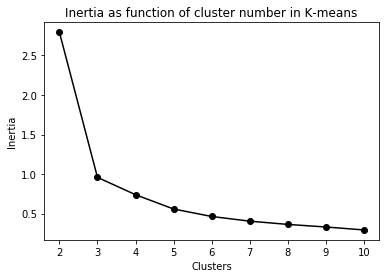

In [42]:
fig = plt.figure(figsize=(6,4))

ax = fig.add_subplot(111)

ax.plot(list(kmeans_cluster_n), kmeans_inertias, marker='o', linestyle='-', c='black')

ax.set_title('Inertia as function of cluster number in K-means')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

According to the elbow rule, the optimal number of clusters should be set at 3.

As the optimal numbero of clusters has been found by the elbow rule - the clustering can now be visualized by applying the clustering to the locations of prostitution occurences in SF.

First the location of prostitution occurences is visualized without the map.

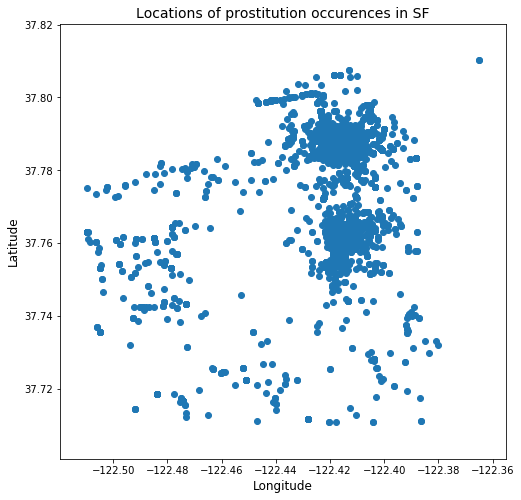

In [43]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(111)

ax.scatter(x=longitude_list, y=latitute_list)
ax.set_xlim(min_lon-0.01, max_lon+0.01)
ax.set_ylim(min_lat-0.01, max_lat+0.01)

ax.set_title("Locations of prostitution occurences in SF", fontsize=14)
ax.set_xlabel("Longitude", fontsize = 12)
ax.set_ylabel("Latitude", fontsize = 12)

plt.show()

Now the clustering on the above data can be performed (w. 3 clusters) and visualised.

In [44]:
kmeans_data = np.array([longitude_list, latitute_list]).T

k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(kmeans_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

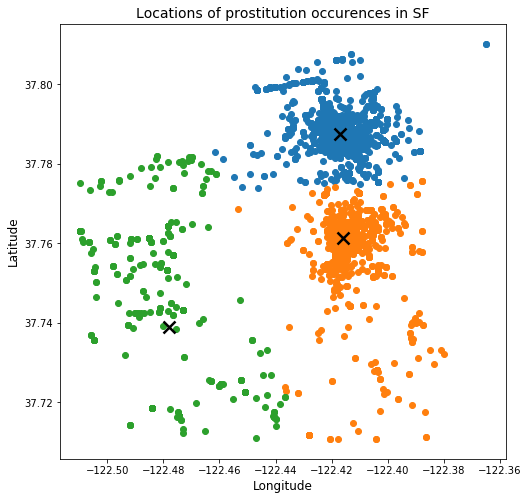

In [46]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(111)

for i in range(k):
    
    # select only data observations with cluster label == i
    ds = kmeans_data[np.where(labels==i)]
    # plot the data observations
    ax.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = ax.plot(centroids[i,0],centroids[i,1],'kx', markersize=12, mew=2.5)

ax.set_title("Locations of prostitution occurences in SF", fontsize=14)
ax.set_xlabel("Longitude", fontsize = 12)
ax.set_ylabel("Latitude", fontsize = 12)   
    
plt.show()

* **Stability analysis**

First, we initialize the grid of the actual distances and their location on the grid.

In [47]:
#for even spacing of gridpoints
lat_step = (max_lat - min_lat)/20 
lon_step = (max_lon - min_lon)/20  

grid_center_locations = np.zeros([20,20,2]) # to hold the lat-lon locations of points on the grid
grid_points_locations = np.zeros([20,20,2]) # to hold the grid-wise indexes (e.g. [12,15])

for idx_row, i in enumerate(np.arange(min_lon, max_lon, lon_step)): # loop thru rows (latitutes)
    for idx_col, j in enumerate(np.arange(min_lat, max_lat, lat_step)): # loop thru columns (longitudes)
        
        grid_center_locations[idx_row,idx_col] = [i, j] # assign the actual location
        grid_points_locations[idx_row,idx_col] = idx_row, idx_col # assing the grid point index
        
grid_center_locations = grid_center_locations.reshape(400,2)
grid_points_locations = grid_points_locations.reshape(400,2)

Next, a function is defined to calculate which point on the grid each centroid belongs to

In [48]:
def cluster_grid_locator(k):
    
    N_center_locs = {} # to hold the grid locations for each cluster

    # each key is the cluster number k, with values as it's location for subsample N (10 in our case)
    for cluster_idx in range(1,k+1):
        N_center_locs[cluster_idx] = []
        
    # we do 10 iterations of random samplings 
    for N in range(10):
        
        N_rand_idx = np.random.randint(kmeans_data.shape[0], size=no_samples) # grab random samples

        kmeans = cluster.KMeans(n_clusters=k) # initialize model
        kmeans.fit(kmeans_data[N_rand_idx]) # fit model on random sample

        current_centers = kmeans.cluster_centers_ # grab the k centroid locations

        # for each center, we find it's grid point index
        for cluster_idx, center in enumerate(current_centers): 
            
            # grab the distance of current cent to all grid points
            center_diff = np.abs(grid_center_locations - center)
            # calculate Chebyshev distance between centroids and all grid points
            center_distances = np.apply_along_axis(np.max, 1, center_diff)
            # grab index of the closest grid point
            center_min_idx = np.argmin(center_distances)
            # grab the coords of closest grid point
            center_min_loc = grid_points_locations[center_min_idx] 
            
            # add the coordinates to the dictionary of center locations
            N_center_locs[cluster_idx+1].append(center_min_loc)
    
    return N_center_locs

Lastly, the intra cosine similarities of of each centroid locations (for all Ns) is calculated to see how well centroid locations converge for different subsamples of the data

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

kmeans_data = np.array([longitude_list, latitute_list]).T
no_samples = int(kmeans_data.shape[0]/2) # to grab 50% of the data in each clustering

clustering_ave_sim = {}

# loop through all cluster numbers
for cluster_no in range(2,11):
    
    # grab the locations of all centroids for N=10
    cluster_no_locs = cluster_grid_locator(cluster_no)
    
    # mean similarities of each centroid location (for all Ns)
    ave_cosine_similarities = []
    
    # loop through all clusters in clustering k
    for sim_collection in cluster_no_locs:
        
        # grab converged locations for all Ns
        current_sim = cluster_no_locs[sim_collection]
        
        # grab their average cosine similarity
        current_ave_cos_dist = np.mean(cosine_similarity(current_sim))
        
        # add it to a list of similarities for each k
        ave_cosine_similarities.append(current_ave_cos_dist)
        

    # the total similarity of the current clustering
    clustering_ave_similarity = np.mean(ave_cosine_similarities)
    
    clustering_ave_sim[cluster_no] = clustering_ave_similarity

As can be seen, in this instance the amount of clusters that shows the highest similarity for different subsets of the data is K=3. It should be noted that calculating the similarity for different subsets (by running the code above) switches between the highest similarity being K=2 and K=3. Therefore, both those clusterings can be considered good for describing the dataset.

In [50]:
clustering_ave_sim

{2: 0.99527471907588638,
 3: 0.99302365426876749,
 4: 0.94981229366368103,
 5: 0.91914834908552623,
 6: 0.90737728976393617,
 7: 0.9101812270397025,
 8: 0.91461544712243981,
 9: 0.89914999732899781,
 10: 0.91089711876172053}

* **Plotting the custering of SF data**

In [51]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(kmeans_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
k_means_idxs = kmeans.labels_ + 1
k_means_centroids = kmeans.cluster_centers_

In [53]:
bbox = BoundingBox(north=max_lat, west=min_lon, south=min_lat, east=max_lon)
gp.set_bbox(bbox)

# Selecting location for each type of crime
latitute_list = df[df['Category'] == 'PROSTITUTION']['Y']
longitude_list = df[df['Category'] == 'PROSTITUTION']['X']

colors = ['blue', 'green', 'red']

for cluster in range(1,4):
    
    current_idx = np.where(k_means_idxs == cluster)
    
    current_lat = np.array(latitute_list)[current_idx]
    current_lon = np.array(longitude_list)[current_idx]

    geo_data_for_plotting = {"lat": current_lat,
                             "lon": current_lon}
    
    geo_center_for_plotting = {"lat": k_means_centroids[cluster-1][1],
                               "lon": k_means_centroids[cluster-1][0]}
    
    # And plotting it, note that shape cannot be changed and neither can the size for centroids only
    gp.dot(geo_data_for_plotting, color=colors[cluster-1], point_size=3)
    gp.dot(geo_center_for_plotting, color=(199,21,133,255), point_size=3)
    
    
gp.inline()